In [137]:
# open file name

fname = '/Users/oamtck/Desktop/Text Mining/text_HTML2.txt'

with open(fname) as f:
    content = f.read()

In [138]:
content

'Argus FMB North American Fertilizer\nHighlights this week\n\x84\x84Loaded urea prices rally, but July values sag \x84\x84Barge delays persist across river system\n\x84\x84California cuts more water use\n\x84\x84Ammonia side dress cut short by rain \x84\x84CF to expand Courtright urea capacity\nCorn vs nitrogen\nUAN (right scale) $/st\nIssue 15-24\u2003 |\u2003 Thursday 18 June 2015\nMarket snapshots\nDAP (right scale) $/st\nContents\nView the methodology used to assess fertilizer prices at www.argusmedia.com/methodology.\nYour feedback is always welcome at fertilizer@argusmedia.com.\nCopyright © 2015 Argus Media Ltd\nLicensed to: Adil Soulami, OCP GROUP\nArgus FMB North American Fertilizer\nNorth American price list\n18 Jun Prior week ± Year ago\nUrea (g) $/st\nIssue 15-24\u2003 |\u2003 Thursday 18 June 2015\n18 Jun Prior week ± Year ago\nDAP $/st, unless noted\nLicensed to: Adil Soulami, OCP GROUP\nUREA pricing series\n\x84\x84Loaded barges firm to $380/st fob Nola on rice demand, sh

In [1]:
def find_max(table):
    nmax = 0
    for i in range(len(table)):
        temp = len(table[i])
        if nmax < temp:
            nmax = temp
    return nmax


def fill_table(table):
    ncol = find_max(table)
    for i in range(len(table)):
        temp_col = len(table[i])
        while temp_col < ncol:
            table[i].append('')
            temp_col = len(table[i])
    return table


def del_empty(table):
    for i in range(len(table)-1,-1,-1):
        if table[i].count('') == len(table[i]):
            del table[i]
    return table

def dataframe_table(table):
    import pandas as pd
    import collections
    nrow = len(table)
    #ncolumn = len(table[0])
    ncolumn = find_max(table)
    df_data = collections.defaultdict(list)
    for i in range(ncolumn):
        temp_name = 'Column ' + str(i)
        temp_list = []
        for j in range(nrow):
            #temp_list.append(table[j][i])
            df_data[temp_name].append(table[j][i])
        #df_data[temp_name].append(temp_list)
    df = pd.DataFrame(df_data)
    return df

def text_to_tableList(text_per_table):
    import re
    temp_table = text_per_table.split('\n')
    result = []
    for i in range(len(temp_table)):
        l = temp_table[i].split('|')
        del l[-1]
        column_list = []
        for j in l:
            tmp = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', j).strip()
            column_list.append(tmp)
        result.append(column_list)
    return result

def check_img(table):
    check = False
    nrow = len(table)
    total_cells = 0
    #ncol = len(table[0])
    check_cells = 0
    for i in range(nrow):
        for j in range(len(table[i])):
            if table[i][j] != '':
                check_cells += 1
        if i == 0:
            total_cells = nrow * len(table[i])
    
    if total_cells == 0:
        return True
    else:
        empt_col = 0
        for i in range(len(table[0])):
            empt_tmp = 0
            for j in range(nrow):
                if table[j][i] == '':
                    empt_tmp += 1
            if empt_tmp == nrow:
                empt_col += 1 
        total_cells = total_cells - (empt_col * nrow)       
        ratio = check_cells / total_cells
        if ratio <= 0.36:
            check = True
        return check        

In [2]:
def get_dataframes(content):
    tables = content.split('\n\n\n\n')
    all_texts = tables[0]
    result_list = []
    for i in range(1,len(tables)):
        table = text_to_tableList(tables[i])
        #check
        fill_table(table)
        del_empty(table)
        
        check = check_img(table)
        if not check:
            k = dataframe_table(table)
            result_list.append(k)
    return result_list

def get_texts(content):
    tables = content.split('\n\n\n\n')
    all_texts = tables[0]
    return all_texts

In [84]:
get_dataframes(content)[2]

,Column 0,Column 1,Column 2
0,NITROGEN,4 February,28 January
1,Urea prilled bulk,,
2,Yuzhny FOB,190-195,185-200
3,Romania FOB,203-207,205-210
4,Baltic FOB,173-190,173-200
5,Arab Gulf FOB,185-200,180-200
6,SE Asia CFR,195-200,195-205
7,NW Europe €pt FCA,225-230,225-235
8,China FOB,190-200,190-195
9,Urea granular bulk (spot),,


In [69]:
len(get_dataframes(content))

45

In [30]:
# analyze per document

def create_dic_allData():
    import collections
    dic = collections.defaultdict(list)
    
    for i in range(1,111):
        if i != 56:
            fname = '/Users/oamtck/Desktop/Text Mining/Txt files/text_HTML{}.txt'.format(i)
            with open(fname) as f:
                content = f.read()
                text = get_texts(content)
                table = get_dataframes(content)
                tmp = [text,table]
                dic[i].append(tmp)
    return dic

In [ ]:
create_dic_allData()

In [68]:
import dateutil.parser as dparser
dparser.parse("05.02.2016\nMarket Update  ",fuzzy=True)

datetime.datetime(2016, 5, 2, 0, 0)

In [73]:
content

'05.02.2016\nMarket Update\nYuzhny tanks contain no OPZ ammonia\n■ Ukraine, Russia\nYuzhny tanks contained 24,800 t of ammonia from which 11,000 t belong to Togliattiazot, 12,600 t to Minudobreniya (Rossosh) and 1,200 t to Dniproazot on February 5.\nRussian producers to transport ammonia to Yuzhny\n■ Russian, Ukraine\nTogliattiazot plans to supply around 150,000 t of ammonia to Yuzhny in February. Minudobreniya (Rossosh) is expected to supply no more than 55,000 t. The company has intensified the product pumping this week as it is to be loaded onto Sanko Innovator for Trammo.\nWorldFertilizerMarket.com\nEditor:\nAlyona Moroz (Tarnavskaya)\nA.Tarnavskaya@WorldFertilizerMarket.com\nOffices:\n73 Volokolamskoye shosse Str., office 403 Moscow, 125424\nRussia\ntel. +7 499 346 03 42\n10/8 Mechnikova Str., office 502 Dnipropetrovsk, 49000 Ukraine\ntel +38 056 370 12 04\nSales department\ntel +7 499 346 03 42 sales@WorldFertilizerMarket.com\nPR and advertising department tel +7 499 346 03 42\na

In [142]:
import dateutil.parser
from itertools import chain
import re

# Add more strings that confuse the parser in the list
UNINTERESTING = set(chain(dateutil.parser.parserinfo.JUMP, 
                          dateutil.parser.parserinfo.PERTAIN,
                          ['a']))

def _get_date(tokens):
    for end in range(len(tokens), 0, -1):
        region = tokens[:end]
        if all(token.isspace() or token in UNINTERESTING
               for token in region):
            continue
        text = ''.join(region)
        try:
            date = dateutil.parser.parse(text)
            return end, date
        except ValueError:
            pass

def find_dates(text, max_tokens=50, allow_overlapping=False):
    tokens = list(filter(None, re.split(r'(\S+|\W+)', text)))
    skip_dates_ending_before = 0
    for start in range(len(tokens)):
        region = tokens[start:start + max_tokens]
        result = _get_date(region)
        if result is not None:
            end, date = result
            if allow_overlapping or end > skip_dates_ending_before:
                skip_dates_ending_before = end
                yield date


test = """Adelaide was born in Finchley, North London on 12 May 1999. She was a 
child during the Daleks' abduction and invasion of Earth in 2009. 
On 1st July 2058, Bowie Base One became the first Human colony on Mars. It 
was commanded by Captain Adelaide Brooke, and initially seemed to prove that 
it was possible for Humans to live long term on Mars."""

print("With no overlapping:")
for date in find_dates(test, allow_overlapping=False):
    print(date)


print("With overlapping:")
for date in find_dates(test, allow_overlapping=True):
    print(date)

With no overlapping:
1999-05-12 00:00:00
2009-07-01 20:58:00
With overlapping:
1999-05-12 00:00:00
1999-05-12 00:00:00
1999-05-12 00:00:00
1999-05-12 00:00:00
1999-05-13 00:00:00
1999-05-13 00:00:00
1999-06-13 00:00:00
1999-06-13 00:00:00
2009-07-01 20:58:00
2009-07-01 20:58:00
2058-07-01 00:00:00
2058-07-01 00:00:00
2058-07-01 00:00:00
2058-07-01 00:00:00
2058-07-13 00:00:00
2058-07-13 00:00:00
2058-06-13 00:00:00
2058-06-13 00:00:00


In [82]:
!pip install datefinder

In [133]:
dir(filter)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [3]:
def link_tableToText(table_list,text_list):
    import collections
    
    dic_data = collections.defaultdict(list)
    
    for i in range(len(table_list)):
        name = str(i)
        tmp = [table_list[i], text_list[i]]
        dic_data[i].append(tmp)
        
    return dic_data

In [4]:

texts_wo_tables = ''
for i in range(1,111):
    if i != 56:
        fname = '/Users/oamtck/Desktop/Text Mining/Txt files/text_HTML{}.txt'.format(i)
        with open(fname) as f:
            content = f.read()
            tmp = get_texts(content)
            texts_wo_tables += tmp

In [5]:
texts_wo_tables

'Argus FMB Sulphur\nFormerly FMB Weekly Sulphur Report\nIssue 15-24\u2003 |\u2003 Thursday 18 June 2015\nMarket summary\nPrices edge up steadily, but can buying from China last?\nPrices have edged up in China and the Middle East this week, following a trend that has been observed in the past weeks. Compared with the yo-yo price trend last year, the current upward movement appears more steady.\nIn China this week, various deals for granular sulphur were reported in the $160-163/t cfr range, showing a slight in- crease on last week. But majority of the buyers remain small to medium-sized fertilizer producers and traders; major players still bid at slightly lower values. Freight is estimated at $13-16/t between Middle East and China, it is therefore of no surprise that fob levels in the Middle East have also ticked up.\nAramco Trading in Saudi Arabia has sold 35,000t of spot sul- phur to a trader in the high-$140s/t fob, and this is believed to be coming from Yasref for July loading in Ya

In [ ]:
# LDA

In [26]:
tables = content.split('\n\n\n\n')
all_texts = tables[0]

In [27]:
all_texts 

'Argus FMB North American Fertilizer\nHighlights this week\n\x84\x84Loaded urea prices rally, but July values sag \x84\x84Barge delays persist across river system\n\x84\x84California cuts more water use\n\x84\x84Ammonia side dress cut short by rain \x84\x84CF to expand Courtright urea capacity\nCorn vs nitrogen\nUAN (right scale) $/st\nIssue 15-24\u2003 |\u2003 Thursday 18 June 2015\nMarket snapshots\nDAP (right scale) $/st\nContents\nView the methodology used to assess fertilizer prices at www.argusmedia.com/methodology.\nYour feedback is always welcome at fertilizer@argusmedia.com.\nCopyright © 2015 Argus Media Ltd\nLicensed to: Adil Soulami, OCP GROUP\nArgus FMB North American Fertilizer\nNorth American price list\n18 Jun Prior week ± Year ago\nUrea (g) $/st\nIssue 15-24\u2003 |\u2003 Thursday 18 June 2015\n18 Jun Prior week ± Year ago\nDAP $/st, unless noted\nLicensed to: Adil Soulami, OCP GROUP\nUREA pricing series\n\x84\x84Loaded barges firm to $380/st fob Nola on rice demand, sh

In [174]:
nonsense_words = ['argus', 'fca', 'copyright', 'www.crugroup.com', 'cru', 'mt', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', 'million']

In [7]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

import nltk
from nltk import sent_tokenize,word_tokenize 

In [172]:
#stemming

lemma = nltk.wordnet.WordNetLemmatizer()
lemma.lemmatize('article')
lemma.lemmatize('pricing')


#ss = nltk.stem.SnowballStemmer('english')

#ss.stem('pricing')

'pricing'

In [175]:
striptext = texts_wo_tables.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
#words = word_tokenize(striptext)
#tokenize each sentence into word tokens
lemma = nltk.stem.SnowballStemmer('english')

texts = [[lemma.stem(word) for word in sentence.lower().split()
        if word not in STOPWORDS and word.isalnum() and nonsense_words and word not in nonsense_words]
        for sentence in sentences]
texts

[['fmb',
  'sulphur',
  'fmb',
  'week',
  'sulphur',
  'report',
  'issu',
  'thursday',
  '18',
  'june',
  'market',
  'summari',
  'price',
  'edg',
  'buy',
  'china'],
 ['price',
  'edg',
  'china',
  'middl',
  'east',
  'follow',
  'trend',
  'observ',
  'past'],
 ['compar', 'price', 'trend', 'current', 'upward', 'movement', 'appear'],
 ['china',
  'deal',
  'granular',
  'sulphur',
  'report',
  'cfr',
  'show',
  'slight',
  'creas'],
 ['major',
  'buyer',
  'remain',
  'small',
  'fertil',
  'produc',
  'major',
  'player',
  'bid',
  'slight',
  'lower'],
 ['freight',
  'estim',
  'middl',
  'east',
  'surpris',
  'fob',
  'level',
  'middl',
  'east',
  'tick'],
 ['aramco',
  'trade',
  'saudi',
  'arabia',
  'sold',
  'spot',
  'phur',
  'trader',
  'believ',
  'come',
  'yasref',
  'juli',
  'load'],
 ['tasweeq', 'thought', 'award', 'trader', 'second', 'half', 'juli'],
 ['bid',
  'heard',
  'fob',
  'lead',
  'expect',
  'award',
  'press',
  'time',
  'strong',
  'indic

In [176]:
dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
#print(dictionary.token2id)
#print(dictionary.keys())
print(corpus[9])
print(texts[9])
dictionary[4]

[(1, 2), (8, 1), (10, 2), (13, 1), (29, 1), (40, 1), (51, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1)]
['china', 'fail', 'return', 'spot', 'market', 'sulphur', 'freight', 'price', 'cpt', 'paid', 'sulphur', 'deliv', 'roadtankcar', 'media', 'licens', 'adil', 'ocp', 'group', 'pate', 'chines', 'new', 'year', 'price', 'erod', 'slight', 'enter']


'issu'

In [177]:
num_topics = 5 #The number of topics that should be generated
passes = 10 

In [178]:
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=10)

In [179]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=10))

[   (   0,
        '0.056*"price" + 0.026*"fob" + 0.024*"cfr" + 0.018*"market" + '
        '0.016*"spot" + 0.014*"offer" + 0.013*"report" + 0.013*"sale" + '
        '0.011*"granular" + 0.011*"low"'),
    (   1,
        '0.051*"import" + 0.029*"year" + 0.029*"export" + 0.019*"price" + '
        '0.019*"increas" + 0.019*"potash" + 0.019*"sulphur" + 0.016*"volum" + '
        '0.015*"market" + 0.012*"acid"'),
    (   2,
        '0.034*"tender" + 0.021*"june" + 0.019*"shipment" + 0.017*"april" + '
        '0.016*"arriv" + 0.016*"close" + 0.015*"cargo" + 0.015*"urea" + '
        '0.015*"st" + 0.014*"deliveri"'),
    (   3,
        '0.041*"price" + 0.024*"use" + 0.024*"fertil" + 0.018*"week" + '
        '0.012*"compani" + 0.012*"20" + 0.011*"freight" + 0.010*"product" + '
        '0.010*"reason" + 0.010*"gtis"'),
    (   4,
        '0.028*"product" + 0.015*"plant" + 0.015*"phosphat" + 0.013*"demand" + '
        '0.012*"produc" + 0.012*"ammonia" + 0.010*"fertil" + 0.009*"rock" + '
        '0.0

In [180]:
pp.pprint(lda.top_topics(corpus,num_words=10))

[   (   [   (0.055900485484603531, 'price'),
            (0.025599528738425321, 'fob'),
            (0.023877613943119772, 'cfr'),
            (0.018180156268697626, 'market'),
            (0.015996699128908887, 'spot'),
            (0.014336246720170873, 'offer'),
            (0.013058844588879921, 'report'),
            (0.012993449660677328, 'sale'),
            (0.011468195403263687, 'granular'),
            (0.010598753097935416, 'low')],
        -108.14641636329505),
    (   [   (0.050665908642596, 'import'),
            (0.028689183075050643, 'year'),
            (0.028627470017174875, 'export'),
            (0.019281011780269589, 'price'),
            (0.018970615649862455, 'increas'),
            (0.01895461580048248, 'potash'),
            (0.018824494533537624, 'sulphur'),
            (0.016496777249000852, 'volum'),
            (0.01517647362347932, 'market'),
            (0.012349132732809831, 'acid')],
        -120.6033784010626),
    (   [   (0.03408370157385477, 'tender

In [102]:
from operator import itemgetter
lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(2, 0.50833362235226287),
 (1, 0.47259785038809643),
 (0, 0.006383190579153525),
 (4, 0.0063769751985117565),
 (3, 0.0063083614819754814)]

In [105]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(' '.join(word_list))


    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

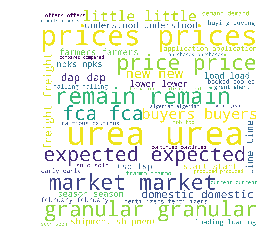

In [117]:
draw_wordcloud(lda,0)